In [2]:
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
from scipy.stats import chi2
import scipy.stats as stats
ds = [206,99,103,105,104,489,108]

In [3]:
df = pd.read_excel('df.xlsx')

# Filter to just KHV rows
khv = df[df['Ethnic'] == 'KHV206g'] 

# Filter to just CYP2B6 rows
cyp2b6 = khv[khv['Gene'] == 'CYP2B6']

# Get unique CYP2B6 alleles 
cyp2b6_alleles = set(cyp2b6['Star Allele 1'].unique()) | set(cyp2b6['Star Allele 2'].unique())

print(cyp2b6_alleles)

{1, 2, 5, 6, 16, 17, 22}


In [4]:
cyp2b6_alleles = list(cyp2b6_alleles)
cyp2b6table = pd.DataFrame(cyp2b6_alleles, columns=['CYP2B6'])
cyp2b6table['KHV'] = 0.0
print(cyp2b6table)
print(cyp2b6_alleles)

   CYP2B6  KHV
0       1  0.0
1       2  0.0
2       5  0.0
3       6  0.0
4      16  0.0
5      17  0.0
6      22  0.0
[1, 2, 5, 6, 16, 17, 22]


In [5]:
khv_cyp2b6 = df.query("Ethnic == 'KHV206g' & Gene == 'CYP2B6'")

print(khv_cyp2b6)
print(cyp2b6_alleles)
start = 0
for allele in cyp2b6_alleles:
  res = 0
  for index, row in khv_cyp2b6.iterrows():
    if allele == row['Star Allele 1']:
      res += row['Percentage per allele']
    if allele == row['Star Allele 2']:  
      res += row['Percentage per allele']
  cyp2b6table.at[start,'KHV'] = res
  start += 1


to_drop = cyp2b6table[cyp2b6table['KHV'] < 1]

# Drop those rows by index
cyp2b6table.drop(index=to_drop.index, inplace=True)
# Divide by 100  
print(cyp2b6table)

      Ethnic              Alleles  Percentage    Gene  Star Allele 1  \
393  KHV206g    CYP2B6*1/CYP2B6*1     45.1500  CYP2B6              1   
394  KHV206g    CYP2B6*1/CYP2B6*2      7.7670  CYP2B6              1   
395  KHV206g   CYP2B6*1/CYP2B6*22      0.4854  CYP2B6              1   
396  KHV206g    CYP2B6*1/CYP2B6*5      1.4560  CYP2B6              1   
397  KHV206g    CYP2B6*1/CYP2B6*6     33.0100  CYP2B6              1   
398  KHV206g  CYP2B6*16/CYP2B6*22      0.4854  CYP2B6             16   
399  KHV206g    CYP2B6*2/CYP2B6*2      0.4854  CYP2B6              2   
400  KHV206g    CYP2B6*2/CYP2B6*6      2.9130  CYP2B6              2   
401  KHV206g   CYP2B6*6/CYP2B6*17      0.4854  CYP2B6              6   
402  KHV206g    CYP2B6*6/CYP2B6*6      7.2820  CYP2B6              6   

     Star Allele 2  Percentage per allele  
393              1                22.5750  
394              2                 3.8835  
395             22                 0.2427  
396              5             

In [6]:
temp = cyp2b6table['CYP2B6'].values.tolist()
ethnics = df['Ethnic'].unique()
ethnics =np.delete(ethnics, -1)
value_to_delete = 'KHV'

# Find index of value 
idx = np.where(ethnics == value_to_delete)[0][0]
ethnics = np.delete(ethnics, idx)
print(ethnics)
cyp2b6_rows = df[df['Gene'] == 'CYP2B6']

# Create bool series to check if allele in temp
allele1_matches = cyp2b6_rows['Star Allele 1'].isin(temp)
allele2_matches = cyp2b6_rows['Star Allele 2'].isin(temp)

# Filter for rows where either allele matches 
mask = allele1_matches | allele2_matches
cyp2b6_population = cyp2b6_rows[mask]
cyp2b6_population = cyp2b6_population[cyp2b6_population['Ethnic'] != 'KHV206g']

print(cyp2b6_population)#print(temp)

['CEU' 'CHB' 'CHS' 'JPT' 'SAS' 'YRI']
   Ethnic             Alleles  Percentage    Gene  Star Allele 1  \
0     CEU   CYP2B6*1/CYP2B6*1     32.3200  CYP2B6              1   
1     CEU  CYP2B6*1/CYP2B6*11      1.0100  CYP2B6              1   
2     CEU  CYP2B6*1/CYP2B6*15      1.0100  CYP2B6              1   
3     CEU   CYP2B6*1/CYP2B6*2      5.0510  CYP2B6              1   
4     CEU  CYP2B6*1/CYP2B6*22      1.0100  CYP2B6              1   
..    ...                 ...         ...     ...            ...   
75    YRI   CYP2B6*2/CYP2B6*2      0.9259  CYP2B6              2   
76    YRI   CYP2B6*2/CYP2B6*6      2.7780  CYP2B6              2   
77    YRI  CYP2B6*6/CYP2B6*16      7.4070  CYP2B6              6   
78    YRI  CYP2B6*6/CYP2B6*17      2.7780  CYP2B6              6   
79    YRI   CYP2B6*6/CYP2B6*6     14.8100  CYP2B6              6   

    Star Allele 2  Percentage per allele  
0               1               16.16000  
1              11                0.50500  
2              1

In [7]:
cyp2b6table_copy = cyp2b6table
for ethnic in ethnics:
        cyp2b6table[ethnic] = 0.0

cyp2b6table = cyp2b6table.reset_index(drop=True)

print(cyp2b6table)

   CYP2B6      KHV  CEU  CHB  CHS  JPT  SAS  YRI
0       1  66.5092  0.0  0.0  0.0  0.0  0.0  0.0
1       2   5.8254  0.0  0.0  0.0  0.0  0.0  0.0
2       6  25.4862  0.0  0.0  0.0  0.0  0.0  0.0


In [8]:
start = 0
for ethnic in ethnics:
    start = 0
    for starallele in temp:
        res = 0

        for index, row in cyp2b6_population.iterrows():
            if row['Ethnic'] == ethnic:
                if starallele == row['Star Allele 1']:
                    res += row['Percentage per allele']
                if starallele == row['Star Allele 2']:  
                    res += row['Percentage per allele']
                cyp2b6table.at[start,ethnic] = res
        #print(start)    
        start += 1
    cyp2b6table[ethnic] = cyp2b6table[ethnic].round(1)

cyp2b6table['KHV'] = cyp2b6table['KHV'].round(1)
cyp2b6table.to_csv('cyp2b6.csv')
print(cyp2b6table)

   CYP2B6   KHV   CEU   CHB   CHS   JPT   SAS   YRI
0       1  66.5  55.0  80.6  80.9  73.1  47.0  38.4
1       2   5.8   4.0   2.4   3.3   2.9   4.1   3.7
2       6  25.5  26.8  14.6  15.2  18.7  37.4  39.3


In [9]:
init = {'CEU': [0], 'CHB': [0], 'CHS': [0], 'JPT': [0], 'SAS': [0], 'YRI': [0]}
gst = pd.DataFrame(init, dtype=float)

h_s_k = 1.0
for index,value in cyp2b6table.iterrows():
    h_s_k -= (cyp2b6table.at[index,'KHV']/100) * (cyp2b6table.at[index,'KHV']/100)

for idx in range(0,6):
    value = 0
    h_t = 1.0
    h_s = 1.0
    for id in range(0,3):
        h_t -= ((cyp2b6table.iloc[id,idx + 2] + cyp2b6table.iloc[id,1])/200) * ((cyp2b6table.iloc[id,idx + 2] + cyp2b6table.iloc[id,1])/200)
        h_s -= (cyp2b6table.iloc[id,idx + 2]/100) * (cyp2b6table.iloc[id,idx + 2]/100)
    h_s = (h_s + h_s_k)/2
    gst.iloc[0,idx] = (h_t - h_s)/h_t # You can modify the value here'''
gst = gst.round(4)
gst.index = ['CYP2B6']
gst.to_csv('gst_cyp2b6.csv')
print(gst)

           CEU     CHB     CHS     JPT     SAS     YRI
CYP2B6  0.0061  0.0197  0.0193  0.0053  0.0228  0.0398


In [10]:
test = list(cyp2b6table['CYP2B6'])
test = ['CYP2B6*' + str(int(item)) for item in test]

def generate_gene_combinations(alleles):
    combinations = list(combinations_with_replacement(alleles, 2))
    sorted_combinations = ["/".join(sorted(comb)) for comb in combinations]
    return sorted_combinations

gene_combinations = generate_gene_combinations(test)
degrees_of_freedom = len(gene_combinations) - 1
print(gene_combinations)

['CYP2B6*1/CYP2B6*1', 'CYP2B6*1/CYP2B6*2', 'CYP2B6*1/CYP2B6*6', 'CYP2B6*2/CYP2B6*2', 'CYP2B6*2/CYP2B6*6', 'CYP2B6*6/CYP2B6*6']


In [11]:
observed = pd.DataFrame(gene_combinations, columns=['Gene'])
new_columns = ['KHV', 'CEU', 'CHB', 'CHS', 'JPT', 'SAS', 'YRI']
for column in new_columns:
    observed[column] = 0.0

print(observed)

                Gene  KHV  CEU  CHB  CHS  JPT  SAS  YRI
0  CYP2B6*1/CYP2B6*1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  CYP2B6*1/CYP2B6*2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  CYP2B6*1/CYP2B6*6  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  CYP2B6*2/CYP2B6*2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  CYP2B6*2/CYP2B6*6  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  CYP2B6*6/CYP2B6*6  0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [12]:
l = len(khv_cyp2b6)
for x in range(0,l):
    if khv_cyp2b6.iloc[x,1] in gene_combinations:
        gene_to_update = khv_cyp2b6.iloc[x,1]
        new_value = khv_cyp2b6.iloc[x,2]
        observed.loc[observed['Gene'] == gene_to_update, 'KHV'] = new_value

length = len(cyp2b6_population)
for x in range(0,length):
    if cyp2b6_population.iloc[x,1] in gene_combinations:
        gene_to_update = cyp2b6_population.iloc[x,1]
        pop_to_update = cyp2b6_population.iloc[x,0]
        new_value = cyp2b6_population.iloc[x,2]
        observed.loc[observed['Gene'] == gene_to_update, pop_to_update ] = new_value 

for x in range(0,7):
    for y in range(0,len(gene_combinations)):
        observed.iloc[y,x+1] = observed.iloc[y,x+1] * ((ds[x] * 1.0)/ 100)

observed = observed.round(0)
print(observed)

                Gene   KHV   CEU   CHB   CHS   JPT    SAS   YRI
0  CYP2B6*1/CYP2B6*1  96.0  32.0  67.0  69.0  56.0  108.0  14.0
1  CYP2B6*1/CYP2B6*2  15.0   5.0   4.0   4.0   5.0   20.0   1.0
2  CYP2B6*1/CYP2B6*6  75.0  30.0  24.0  27.0  29.0  170.0  39.0
3  CYP2B6*2/CYP2B6*2   4.0   0.0   0.0   0.0   0.0    1.0   1.0
4  CYP2B6*2/CYP2B6*6   8.0   2.0   0.0   3.0   0.0   14.0   3.0
5  CYP2B6*6/CYP2B6*6   4.0   5.0   3.0   1.0   5.0   72.0  16.0


In [13]:
hypo = pd.DataFrame(gene_combinations, columns=['Gene'])
for column in new_columns:
    hypo[column] = 0.0

allele = cyp2b6table.iloc[:,0].tolist()

for x in range(0,7):
    temp = cyp2b6table.iloc[:,x + 1].tolist()
    for allele1 in range(0,len(temp)):
        for allele2 in range(allele1,len(temp)):
            if allele1 == allele2:
                new_value = (temp[allele1] / 100) * (temp[allele2] / 100)
            elif allele1 != allele2:
                new_value = 2 * (temp[allele1] / 100) * (temp[allele2] / 100)
            gene = f"CYP2B6*{int(allele[allele1])}/CYP2B6*{int(allele[allele2])}"
            row_index = hypo.index[hypo['Gene'] == gene].tolist()[0]
            hypo.iloc[row_index, x+1] = new_value

print(hypo)

                Gene       KHV       CEU       CHB       CHS       JPT  \
0  CYP2B6*1/CYP2B6*1  0.442225  0.302500  0.649636  0.654481  0.534361   
1  CYP2B6*1/CYP2B6*2  0.077140  0.044000  0.038688  0.053394  0.042398   
2  CYP2B6*1/CYP2B6*6  0.339150  0.294800  0.235352  0.245936  0.273394   
3  CYP2B6*2/CYP2B6*2  0.003364  0.001600  0.000576  0.001089  0.000841   
4  CYP2B6*2/CYP2B6*6  0.029580  0.021440  0.007008  0.010032  0.010846   
5  CYP2B6*6/CYP2B6*6  0.065025  0.071824  0.021316  0.023104  0.034969   

        SAS       YRI  
0  0.220900  0.147456  
1  0.038540  0.028416  
2  0.351560  0.301824  
3  0.001681  0.001369  
4  0.030668  0.029082  
5  0.139876  0.154449  


In [14]:
for x in range(0,7):
    for y in range(0,len(gene_combinations)):
        hypo.iloc[y,x+1] = hypo.iloc[y,x+1] * ((ds[x] * 1.0))
        if hypo.iloc[y,x+1] < 1:
            hypo.iloc[y,x+1] = 1
hypo = hypo.round(0)
print(hypo)

                Gene   KHV   CEU   CHB   CHS   JPT    SAS   YRI
0  CYP2B6*1/CYP2B6*1  91.0  30.0  67.0  69.0  56.0  108.0  16.0
1  CYP2B6*1/CYP2B6*2  16.0   4.0   4.0   6.0   4.0   19.0   3.0
2  CYP2B6*1/CYP2B6*6  70.0  29.0  24.0  26.0  28.0  172.0  33.0
3  CYP2B6*2/CYP2B6*2   1.0   1.0   1.0   1.0   1.0    1.0   1.0
4  CYP2B6*2/CYP2B6*6   6.0   2.0   1.0   1.0   1.0   15.0   3.0
5  CYP2B6*6/CYP2B6*6  13.0   7.0   2.0   2.0   4.0   68.0  17.0


In [15]:
hihi = {"KHV": [0.0], "CEU": [0.0], "CHB": [0.0], "CHS": [0.0], "JPT": [0.0], "SAS": [0.0], "YRI": [0.0]}
chi_square = pd.DataFrame(hihi)
print(chi_square)
for x in range(0,7):
    res = 0
    for y in range(0,len(hypo)):
        chi_square_value = ((hypo.iloc[y,x+1] - observed.iloc[y,x+1]) * (hypo.iloc[y,x+1] - observed.iloc[y,x+1])) / (hypo.iloc[y,x+1])
        res += chi_square_value

    p_value = 1 - stats.chi2.cdf(res, degrees_of_freedom)
    chi_square.iloc[0,x] = p_value 

chi_square.index = ['CYP2B6']
chi_square = chi_square.round(4)
print(chi_square)

   KHV  CEU  CHB  CHS  JPT  SAS  YRI
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
           KHV     CEU     CHB     CHS     JPT     SAS     YRI
CYP2B6  0.0053  0.8506  0.7765  0.2868  0.7711  0.9959  0.7411


In [20]:
print(cyp2b6table)

         KHV   CEU   CHB   CHS   JPT   SAS   YRI
CYP2B6                                          
1       66.5  55.0  80.6  80.9  73.1  47.0  38.4
2        5.8   4.0   2.4   3.3   2.9   4.1   3.7
6       25.5  26.8  14.6  15.2  18.7  37.4  39.3


In [21]:
cyp2b6table = cyp2b6table.transpose()
print(cyp2b6table)

CYP2B6     1    2     6
KHV     66.5  5.8  25.5
CEU     55.0  4.0  26.8
CHB     80.6  2.4  14.6
CHS     80.9  3.3  15.2
JPT     73.1  2.9  18.7
SAS     47.0  4.1  37.4
YRI     38.4  3.7  39.3


In [22]:
print(cyp2b6table.index)
print(cyp2b6table.columns)

Index(['KHV', 'CEU', 'CHB', 'CHS', 'JPT', 'SAS', 'YRI'], dtype='object')
Index([1, 2, 6], dtype='int64', name='CYP2B6')


In [23]:
cyp2b6table_copy = cyp2b6table
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cyp2b6table)
PCA(n_components=2)

PCA(n_components=2)

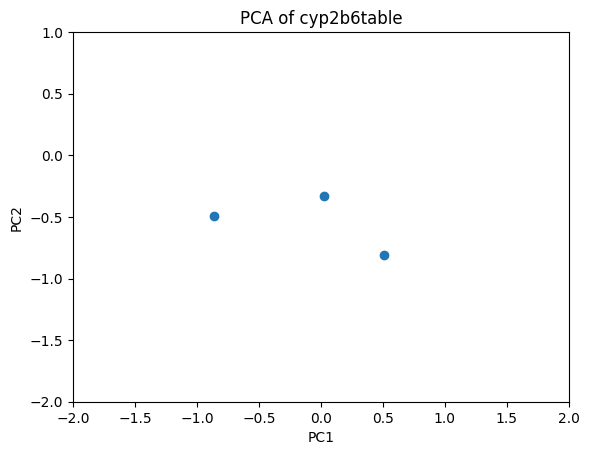

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(pca.components_[0, :], pca.components_[1, :])
plt.xlim([-2, 2])
plt.ylim([-2, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of cyp2b6table")
plt.show()

In [26]:
print(pca.explained_variance_ratio_)

[0.98971825 0.00832494]
